C:\Users\Luka Brennan\AppData\Local\Temp\ipykernel_27712\3198819801.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_stats = df.groupby('Age Group')['Survived'].agg(['mean', 'count']).reset_index() # Groups the Age Group to calculate the average


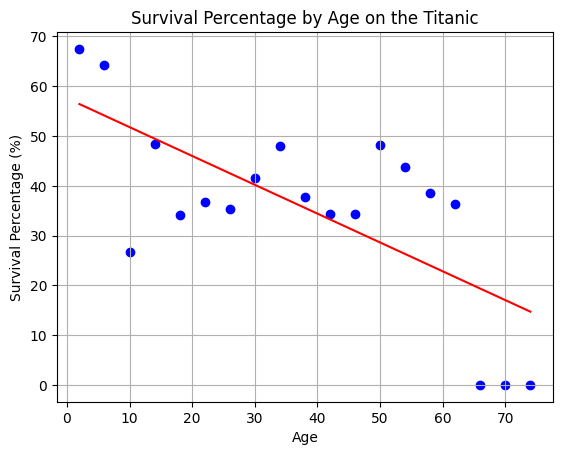

In [ ]:
#Imports
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore

df = pd.read_csv('train.csv')

df = df.dropna(subset=['Age', 'Survived']) # Drops any data inside of Age or Survied that is empty
    
agerange = np.arange(0,80,4) # Creates a age range array where 0 is the start and 80 is the end, 4 is how much it is incremented 

df['Age Group'] = pd.cut(df['Age'], bins=agerange) # Creates a "Age Group" coloumn which contains the age for each person

survival_stats = df.groupby('Age Group')['Survived'].agg(['mean', 'count']).reset_index() # Groups the Age Group to calculate the average
    
survival_stats['Survival Percentage'] = survival_stats['mean'] * 100 # Calculates the percentage    

survival_stats['Age Midpoint'] = survival_stats['Age Group'].apply(lambda x: x.mid) # Uses the Midpoints of the Age Groups using the "mid" attribute

X = survival_stats[['Age Midpoint']] 
y = survival_stats['Survival Percentage']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X) # Predicate the survival percentage

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
#plt.plot(X, y, color='red', linewidth=2)

plt.title('Survival Percentage by Age on the Titanic')
plt.xlabel('Age')
plt.ylabel('Survival Percentage (%)')
plt.grid(True)
plt.show()